# Introduction

In this notebook, we cover the foundations of neural networks.

We start by talking about **biological neurons** and how they inspired a very simple type of neuron: **the Perceptron**. We will show that a Perceptron is really a linear classifier.

If you create a **Perceptron Network**, you end up with a more complex linear classifier.

Linear classifiers are very useful, but can't solve all problems. To modify a perceptron to make it even more powerful, we look at the **Activation Function**. The activation function takes you from the input to the output. In the case of a perceptron, it's a simple step function. If you change this activation slightly to make it a continuous function, it has very attractive mathematical properties.

In particular, we talk about the sigmoid activation function. This allows us to create a **Sigmoid Neuron**, which we can put together to create a neural network. We will discuss the **Neural Network Architecture** and the key challenges of training them.

A reasonably sized NN could have millions of parameters. Given training data, one of the goals is to find the parameters of NN that are going to perform the mapping of input to output with a high level of reliability and accurancy. For that, we use a technique called **Gradient Descent**. In practice, gradient descent is performed using **Backpropagation**. Backpropagation is a technique based on the Chain Rule for Derivatives (and is something we will only briefly mention, providing further resources for the mathematicians amongst us).

# 1. Perceptron

A Perceptron takes several inputs and gives a single binary output:

<img src="perceptron_inputs_outputs.png" width="500" style="display: block; margin: 0 auto" />

$$
f = \begin{cases}
   0 &\text{if } \sum_{\substack{j}}w_{j}x_{j} \leq -b \\
   1 &\text{if } \sum_{\substack{j}}w_{j}x_{j} \gt -b
\end{cases}
= \begin{cases}
   0 &\text{if } \bold{w.b} + b \leq 0 \\
   1 &\text{if } \bold{w.b} + b \gt 0
\end{cases}
$$

where $w_{j} = \text{weights and } b = \text{bias}$.

The output of a neuron is also referred to as its **activation**. If we let $z = \bold{w.x} + b$, we can rewrite the above as:
$$
a = f(z) = \begin{cases}
   0 &\text{if } z \leq 0 \\
   1 &\text{if } z \gt 0
\end{cases}
$$
$f$ is a **step function**, and is called the **activation function** of this neuron.

# 1.1 Example

Suppose I want to answer the question: *"Will Liza go to Emma's party?"*
<img src="emmas_party.png" width="500" style="display: block; margin: 0 auto">

If Hannah goes, Liza really doesn't want to go.
But if Kristine goes, Liza would quite like to go, i.e. $w_1 = -3$, $w_2 = 2$.
And if neither of them go, Liza would like to stay home, i.e. $b = -1$.

So if both Hannah and Kristine are going, Liza isn't:
<img src="emmas_party_2.png" width="500" style="display: block; margin: 0 auto">

$
z = x_{1}w_{1} + x_{2}w_{2} + b = 1(-3) + 1(2) - 1 = -2
a = f(z) = 0
$

# 1.2 Perceptron as a Linear Classifier

Graphing the above example, we see that a Perceptron is simply a linear classifier.

<img src="linear_classifier.png" width="500" style="display: block; margin: 0 auto">

# 1.3 Perceptron in Code

TODO: explain what below code is doing?

In [ ]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.

    """

    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    # Train the perceptron
    def fit(self, X, y):
        """Fits training data.
        This function take the input of features,
        make predictions, update the weights n_iter times.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """

        # initializing the weights
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        # print("Weights:", self.w_)

        for _ in range(self.n_iter):
            error = 0
            for xi, target in zip(X, y):

                # 1. calculate y^
                y_pred = self.predict(xi)

                # 2. calculate Update
                # update = η * (y - y^)
                update = self.eta * (target - y_pred)

                # 3. Update the weights
                # Wi = Wi + Δ(Wi)       where  Δ(Wi) = update * Xi
                self.w_[1:] = self.w_[1:] + update * xi
                # print(self.w_[1:])

                # Xo = 1 => update * 1 = update
                self.w_[0] = self.w_[0] + update

                # update != 0  ==>  y^ != y  ==>  there is an error
                error += int(update != 0.0)

            self.errors_.append(error)

        return self

    # Weighted Sum
    def net_input(self, X):
        """
        The net_input() function returns the dot product
        i.e. the weighted sum: sum of w*x
        :param: X: an array of features (inputs)
        Returns:
            the dot product of W and X
        """
        # Z = sum (Wi * Xi) where Wo = 0 et Xo = 1
        return np.dot(X, self.w_[1:]) + self.w_[0]

    # Step Function
    def predict(self, X):
        """
        The activation function.
        Returns the predicted value
        :param X: an array of features
        :return:
            y_pred - the predicted value:
                0 if the weighted sum < 0
                1 otherwise
        """
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# 2. Perceptron Network

Some regions are impossible to classify with just one Perceptron, for example the figure below.

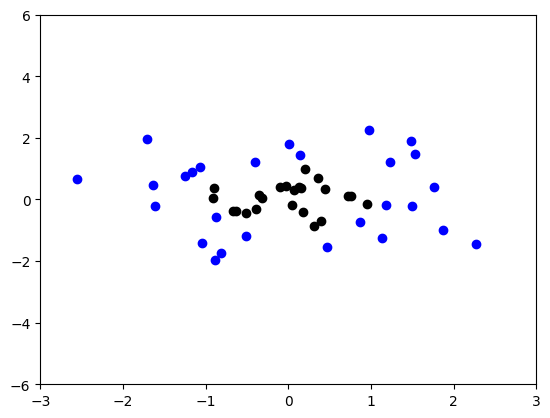

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(0)
n_samples = 50
X = np.random.randn(n_samples, 2)
y = np.zeros(n_samples)
y[np.linalg.norm(X, axis=1) > 1] = 1

# Plot the data
plt.scatter(X[y==0, 0], X[y==0, 1], color='black')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')

plt.xlim(-3, 3)
plt.ylim(-6, 6)
plt.savefig('complex_region.png')
plt.show()

In this scenario, we could use 4 linear classifiers 

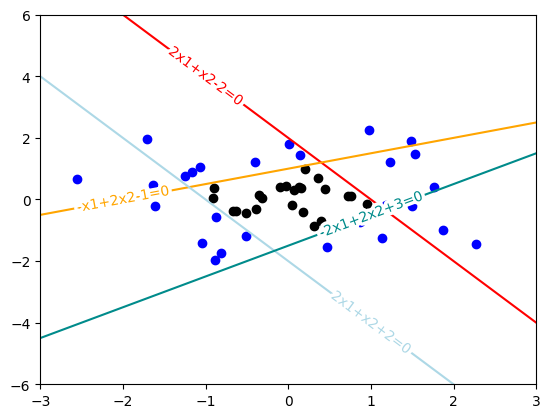

In [28]:
from labellines import labelLines

# Plot the data
plt.scatter(X[y==0, 0], X[y==0, 1], color='black')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')

# linear classifications
t = np.linspace(-3, 3, 100)
plt.plot(t, -2*t+2, linestyle='-', color='red', label='2x1+x2-2=0') # 2x1 + x2 - 2 = 0
plt.plot(t, 0.5*t+1, linestyle='-', color='orange', label='-x1+2x2-1=0') # - x1 + 2x2 - 1 = 0
plt.plot(t, -2*t-2, linestyle='-', color='lightblue', label='2x1+x2+2=0') # 2x1 + x2 + 2 = 0
plt.plot(t, 1*t-1.5, linestyle='-', color='darkcyan', label='-2x1+2x2+3=0') # - 2x1 + 2x2 + 3 = 0

labelLines(plt.gca().get_lines(), align=True, xvals=[-1, -2, 1, 1])

plt.xlim(-3, 3)
plt.ylim(-6, 6)
plt.savefig('complex_region_classifier.png')
plt.show()

Here if you get an output of 1 from each of these linear classifiers only if the point lies inside the region. If all the perceptrons produce a 1, the output nepceptron and weights will be set can be set such that it produces an output of 1 only in the case when all the inputs to it are 1.

While this is shown in 2D space, it generalises in any number of dimensions.

<img src="complex_classifier_perceptron_diagram.png" width="1000" style="display: block; margin: 0 auto">

A multi-layer perceptron network has the same general structure:

<img src="multi_layer_perceptron_network.avif" width="700" style="display: block; margin: 0 auto">

The above diagram is also known as a **fully-connected network** because every neuron is connected to every other neuron. This does not have to be the case, which we will demonstrate later.

# 3. Activation Function

The activation function is the function that takes you from the input to the output. For a Perceptron, it is the step function.

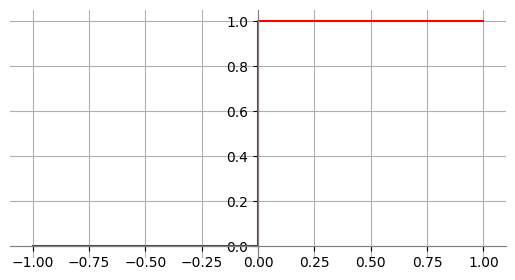

In [47]:
import matplotlib.pyplot as plt

x = [-1, 0, 1] 
y = [0, 0, 1]

fig, ax = plt.subplots()

ax.step(x, y, color='red')

ax.set_aspect('equal')
ax.grid(True, which='both')

ax.spines['left'].set_position('zero')
ax.spines['left'].set_color('grey')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_color('grey')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()